<a href="https://colab.research.google.com/github/renzotesta/advanced_programming_2021/blob/master/BoltzmannMachines_DLproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Abstract
This notebook presents the work done for the Deep Learning exam. My interests are in physics-related models and, in general, in theoretically grounded models. In this respect, I found the subject of Boltzmann machines quite fascinating and I decided to deep-dive into it.
Since we did not review Boltzmann machines during lectures, a significant part of the work has been devoted to studying the theory behind it, for which I report the main and most relevant results (in my opinion) and about which I feel confident discussing about. This part is mostly composed of a review end excerpts of selected literature.

A second part is devoted to presenting a simple application of Restricted Boltzmann machines for the MNIST dataset.

Finally, bridging this subject to my specialization curriculum in quantum computing I'll briefly present a recent research article in quantum Boltzmann machines.

# 1 Why Boltzmann machines?

Although in many situations, other deep learning architectures such as autoencoders are preferred, the idea behind Boltzmann machines and their mathematical formulation is both powerful and elegant and the more general topic of energy-based models finds applications in other machine learning applications. 
For example a recent publication from NVIDIA Research [1] proposes so called VAEBM, "a symbiotic composition of a VAE and an EBM that offers the best of both worlds": the ability of EBM in representing complex distributions of small images and ability of VAEs to generate samples quickly (which is where EBMs suffer).

About the ability of Boltzmann machines to represent complex distributions, Hinton and Sejnowski, wrote in their work of 1985 [2]:
>"*we have an interesting mathematical result that guarantees that a certain learning procedure will build internal representations which allow the connection strengths to capture the underlying constraints that are implicit in a large ensemble of examples taken from a domain*".

Finally, as mentioned above, quantum machine learning approaches might reveal particularly interesting for such physics-related models.

[1] Zhisheng Xiao, Karsten Kreis, Jan Kautz, Arash Vahdat, (2021). VAEBM: A Symbiosis between Variational Autoencoders and Energy-based Models, International Conference on Learning Representations (ICLR), 2021.

[2] Ackley, D., Hinton, G., and Sejnowski, T. (1985. A Learning Algorithm for Boltzmann Machines. Cognitive Science, 9(1):147-169.

# 2 What is a Boltzmann machine and what is it good at:

from Geoffrey E. Hinton (2007), Scholarpedia:

>*A Boltzmann machine is a <strong>network of symmetrically connected, neuron-like units that make stochastic decisions about whether to be on or off</strong>. Boltzmann machines have a <strong>simple learning algorithm</strong> (Hinton & Sejnowski, 1983) that allows them to discover interesting features that represent complex regularities in the training data. The <strong>learning algorithm is very slow in networks with many layers of feature detectors, but it is fast in "restricted Boltzmann machines" that have a single layer of feature detectors</strong>. Many hidden layers can be learned efficiently by composing restricted Boltzmann machines, using the feature activations of one as the training data for the next.*

>*Boltzmann machines are <strong>used to solve two quite different computational problems</strong>. For a <strong>search problem</strong>, the weights on the connections are fixed and are used to represent a cost function. The stochastic dynamics of a Boltzmann machine then allow it to sample binary state vectors that have low values of the cost function.*

>*For a <strong>learning problem, the Boltzmann machine is shown a set of binary data vectors and it must learn to generate these vectors with high probability</strong>. To do this, it must find weights on the connections so that, relative to other possible binary vectors, the data vectors have low values of the cost function. To solve a learning problem, Boltzmann machines make many small updates to their weights, and each update requires them to solve many different search problems.*

## 2.1 The Boltzmann machine
Now we get more formal. Most of the following material reports directly selected portions of the extensive review provided by Takayuki Osogami, at IBM research, presented in 2017 (https://researcher.watson.ibm.com/researcher/view_group.php?id=7834):

As we already said above, a Boltzmann machine is a network of units that are connected to each other (see Figure 1). Let $N$ be the number of units. Each unit takes a binary value (0 or 1). Let <strong>$X_i$ be the random variable representing the value of the $i$-th unit</strong> for $i \in [1, N]$. We use a column vector $X$ to denote the random values of the $N$ units. The Boltzmann machine has two types of parameters: <strong>bias and weight</strong>. Let $b_i$ be the bias for the $i$-th unit for $i \in [1, N]$, and let $w_{i,j}$ be the weight between unit $i$ and unit $j$ for $(i, j) \in [1, N − 1] × [i + 1, N]$. We use a column vector $b$ to denote the bias for all units and a matrix $W$ to denote the weight for all pairs of units. Namely, the $(i, j)$-th element of $W$ is $w_{i,j}$ . We let $w_{i,j} = 0$ for $i ≥ j$ and for the pair of units $(i, j)$ that are disconnected each other. The parameters are collectively denoted by:

$$\theta \equiv(b1,\cdots, b_N , w_{1,2},\cdots, w_{N−1,N})$$

which we also denote as $\theta = (b,W)$.




<p align="center">

<img src="https://drive.google.com/uc?id=1qbln0vB7SPi3C0HDrir2zzopkn8x2xDU " width=400>

</p>

The <strong>energy of the Boltzmann machine</strong> is defined by the quadratic form:
$$E_{θ}(x) = − \sum_{i=1}^N b_i x_i - \sum_{i=1}^{N-1} \sum_{j=i+1}^N w_{i,j} x_i x_j = -\textbf{b}^T \textbf{x} - \textbf{x}^T \textbf{W} \textbf{x}$$

<strong>From the energy, the Boltzmann machine defines the probability over binary patterns</strong> as follows:

$$ P_{\theta} = \frac{e^{-E_{\theta}(x)}} {\sum_{\tilde{x}} e^{-E_{\theta}(\tilde{x})}}$$

where <u>the summation with respect to $\tilde{x}$ is over all possible $N$ bit binary values</u>. It must be noticed that this becomes quickly a very large set since it scales as $2^N$. The denominator is also known as a <strong>partition function</strong>:

$$ Z \equiv \sum_{\tilde{x}} e^{-E_{\theta} (\tilde{x})} $$

A Boltzmann machine <u>can be used to model the probability distribution, $P_{target}(\cdot)$, of a target pattern</u>. Namely, <u>by optimally setting the values of $\theta$, we approximate $P_{target}(\cdot)$ with $P_{\theta}(\cdot)$</u>. Here, some of the units of the Boltzmann machine are allowed to be <strong> hidden </strong>, which means that those units do not directly correspond to the target patterns (see Figure 2). The units that directly correspond to the target patterns are called <strong> visible </strong>. <u> The primary purpose of the hidden units is to allow particular dependency between visible units, which cannot be represented solely with visible units </u>. The visible units may be divided into input and output (see Figure 2c). Then the Boltzmann machine can be used to model the conditional  distribution of the output patterns given an input pattern.

<p align="center">

<img src="https://drive.google.com/uc?id=1AnirIyWNUgcF83wf8mniqMVJDSh8bKmH" width='900'>

</p>

### 2.1.1 Learning a generative model
Now we consider the problem of optimally setting the values of $\theta$ in a way that $\mathbb{P}_{\theta}(\cdot)$ best approximates a given $\mathbb{P}_{target}(⋅)$. Specifically, <u> we seek to minimize the Kullback-Leibler (KL) divergence from $\mathbb{P}_{\theta}$ to $\mathbb{P}_{target}$ </u>:

$$KL(\mathbb{P}_{target} \| \mathbb{P}_{\theta}) = \sum_{\tilde{x}} \mathbb{P}_{target}(\tilde{\textbf{x}}) log \frac{\mathbb{P}_{target}(\tilde{\textbf{x}})} {\mathbb{P}_{\theta}(\tilde{\textbf{x}})}$$

$$ = \sum_{\tilde{\textbf{x}}} \mathbb{P}_{target}(\tilde{\textbf{x}}) log \mathbb{P}_{target}(\tilde{\textbf{x}}) - \sum_{\tilde{\textbf{x}}} \mathbb{P}_{target}(\tilde{\textbf{x}}) log \mathbb{P}_{\theta}(\tilde{\textbf{x}})$$
Since the first term is independent of $\theta$, it suffices to maximize:

$$f(\theta) = \sum_{\tilde{x}} \mathbb{P}_{target}(\tilde{\textbf{x}}) log \mathbb{P}_{\theta}(\tilde{\textbf{x}})$$

A <u> special case of $\mathbb{P}_{target}$ is the empirical distribution of patterns in a given dataset </u>:
$$\mathcal{D} = \{\textbf{x}^{(d)}\}_{d=1}^D$$
where $D$ is the number of patterns in $\mathcal{D}$.

The objective function $f(\theta)$ then becomes:

$$f(\theta) = \frac{1}{D} \sum_{\textbf{x} \in \mathcal{D}} log \mathbb{P}_{\theta} (\textbf{x}) = \frac{1}{D} log \prod_{\textbf{x} \in \mathcal{D}} \mathbb{P}_{\theta}(\textbf{x})$$

which is the log-likelihood of $\mathcal{D}$ (multiplied by $\frac{1}{D}$).

By defining:
$$\mathbb{P}_{\theta}(\mathcal{D}) \equiv \prod_{\textbf{x} \in \mathcal{D}} \mathbb{P}_{\theta} (\textbf{x})$$

we have:

$$f(\theta) = \frac{1}{D} log \mathbb{P}_{\theta} (\mathcal{D})$$

and <u> to find the optimal values of $\theta$ we can take the gradient of $f(\theta)$ with respect to $\theta$ </u>:

$$ \nabla f(\theta) = \sum_{\tilde{\textbf{x}}} \mathbb{P}_{target}(\tilde{\textbf{x}}) \nabla log \mathbb{P}_{\theta} (\tilde{\textbf{x}})$$


## 2.2 All units are visible

The simplest case is when all units are visible.
Using the probability defined through the energy as above, we can derive a specific expression for the term $\nabla log \mathbb{P}_{\theta} (\tilde{\textbf{x}})$, which finally leads to the following expression for the log-likelihood gradient:

$$\nabla f(\theta) = - \sum_{\tilde{\textbf{x}}} \mathbb{P}_{target}(\tilde{\textbf{x}}) \nabla E_\theta(\tilde{\textbf{x}}) + \sum_{\tilde{\textbf{x}}} \mathbb{P}_{target}(\tilde{\textbf{x}}) \sum_{\tilde{\textbf{x}}} \mathbb{P}_\theta(\tilde{\textbf{x}}) \nabla E_\theta(\tilde{\textbf{x}}) $$
$$ = - \sum_{\tilde{\textbf{x}}} \mathbb{P}_{target}(\tilde{\textbf{x}}) \nabla E_\theta(\tilde{\textbf{x}}) + \sum_{\tilde{\textbf{x}}} \mathbb{P}_\theta(\tilde{\textbf{x}}) \nabla E_\theta(\tilde{\textbf{x}}) $$
$$ =  -\mathbb{E}_{target} [\nabla E_\theta (\textbf{X})] + \mathbb{E}_\theta[\nabla E_\theta(\textbf{X})]$$

where $\mathbb{E}_{target}[\cdot]$ is the expectation with respect to $\mathbb{P}_{target}$, $\mathbb{E}_\theta[\cdot]$ is the expectation with respect to $\mathbb{P}_\theta$ and $\textbf{X}$ is the vector of random variables denoting the values of the $N$ units.
It is important to underline that <u> the expression of the gradient holds for any form of energy, as long as the energy is used to define the probability </u>.

For the specific quadratic form of the energy given above, we have:

$$ \frac{\partial}{\partial{b_i}} E_\theta(\textbf{x}) = - x_i $$
$$ \frac{\partial}{\partial{w_{i,j}}}E_\theta (\textbf{x}) = -x_i x_j$$

for $i \in [1, N]$ and $(i,j) \in [1,N-1]x[i+1,N]$, which finally gives:

$$ \frac{\partial}{\partial{b_i}} f(\theta) = \mathbb{E}_{target}[X_i] - \mathbb{E}_\theta[X_i] $$
$$ \frac{\partial}{\partial{w_{i,j}}} f(\theta) = \mathbb{E}_{target}[X_iX_j] - \mathbb{E}_\theta[X_iX_j]$$

where $X_i$ is the random variable denoting the value of the $i$-th unit for each $i \in [1,N]$.
We notice that the expected value of $X_i$ is the same as the probability of $X_i$ because $X_i$ is binary.
In general, for large $N$, each evaluation of $\mathbb{E}_\theta [X_i]$ and $\mathbb{E}_\theta [X_iX_j]$ is computationally intractable and will see how we can deal with it later on.

A gradient ascent method (we are maximizing the log-likelihood) is thus to iteratively update the paramters as $\theta \leftarrow \theta + \eta \nabla f(\theta)$:

$$b_i \leftarrow b_i + \eta(\mathbb{E}_{target}[X_i] -\mathbb{E}_\theta[X_i])$$
$$w_{i,j} \leftarrow w_{i,j} +\eta(\mathbb{E}_{target}[X_iX_j] - \mathbb{E}_\theta[X_iX_j])$$

<u>Intuitively, $b_i$ controls how likely the $i$-unit takes the value $1$ and $w_{i,j}$ contols how likely the $i$-th unit and the $j$-th unit simultaneously take the value $1$</u>. For example, when $\mathbb{E}_\theta[X_iX_j]$ is smaller than $\mathbb{E}_{target}[X_iX_j]$, we increase $w_{i,j}$ to increase $\mathbb{E}_\theta[X_iX_j]$.
This form or learning rule appears frequently in the context of Boltzmann manchines. Namely, we compare our prediction $\mathbb{E}_\theta[\cdot]$ againt the target $\mathbb{E}_{target}[\cdot]$ and update $\theta$ in a way that $\mathbb{E}_\theta[\cdot]$ gets closer to $\mathbb{E}_{target}[\cdot]$.

### 2.2.1 Stochastic gradient

Combining the first and the third equivalent expressions of the the gradient of the log-likelihood, it can be rewritten as:

$$\nabla f(\theta) = \sum_{\tilde{\textbf{x}}} \mathbb{P}_{target}(\tilde{\textbf{x}})(-\nabla E_\theta(\tilde{\textbf{x}}) + \mathbb{E}_\theta[\nabla E_\theta(\textbf{X})])$$

Namely, $\nabla f(\theta)$ is given by the expected value of $g_\theta = −\nabla E_\theta(\textbf{X}) + \mathbb{E}_\theta [\nabla E_\theta(\textbf{X})]$, where the first $\textbf{X}$ is distributed with respect to $P_{target}$, while the second term is an expectation with respect to $P_\theta$.

This suggests stochastic gradient methods such as: <u>at each step, we sample a pattern $X(\omega)$ according to $P_{target}$ and update $\theta$ according to the stochastic gradient</u>:
$$\theta \leftarrow \theta +\eta g_\theta (\omega)$$

<u>When the target distribution is the empirical distribution given by the training data $\mathcal{D}$, we only need to take a sample $\textbf{X}(\omega)$ from $\mathcal{D}$ uniformly at random</u>.
The intuitive interpretation of the stochastic gradient method above is that each step, we sample a pattern according to the target distribution (or from the training data) and update $\theta$ in a way that the energy of the sampled pattern is reduced (notice that the sampled pattern is represented by the first term in $g_\theta$ and it appears with negative sign of the gradient of its energy). At the same time, the energy of every pattern is increased (notice that this is the second term in $g_\theta$, which has positive sign in includes all patterns given by the current value of $\theta$), where the amount of the increase is proportional to the probability for the Boltzmann machine with the latest parameter $\theta$ to generate that pattern.

<p align="center">

<img src="https://drive.google.com/uc?id=18_PzZZwC-10KkbcTgwpiPNTQFAGGahCs" width='500'>

</p>

Taking into account the specific quadratic form of the energy given a the beginnig, we can derive the specific form of the stochastic gradient (basically substituting to the expectation with respect to $\mathbb{P}_{target}$ with sampled values):

$$ \frac{\partial}{\partial{b_i}} E_\theta(\textbf{x})(\omega) = X_i(\omega) - \mathbb{E}_\theta[X_i] $$
$$ \frac{\partial}{\partial{w_{i,j}}}E_\theta (\textbf{x})(\omega) = X_i(\omega)X_j(\omega) - \mathbb{E}_\theta[X_iX_j]$$

which suggests a stochastic gradient method of iteratively sampling a pattern $\textbf{X}(\omega)$ according to a target probability distribution and updating the parameters as follows:

$$ b_i \leftarrow b_i + \eta (X_i(\omega) - \mathbb{E}_\theta[X_i])$$
$$ w_{i,j} \leftarrow w_{i,j} +\eta (X_i(\omega)X_j(\omega) - \mathbb{E}_\theta[X_iX_j])$$

for $i \in [1, N]$ and $(i,j) \in [1, N-1]\times[i+1, N]$.

## 2.3 Connection with biological neural networks
The following discussion provides <u> another interesting point that supports the relevance of Boltzmann machines </u>.

The <u> learning rule of the weights $w_{i,j}$ has a paramount importance of providing a theoretical foundation for Hebb’s rule of learning in biological neural networks [3] </u>:
> *When an axon of cell A is near enough to excite a cell B and repeatedly or persistently takes part in firing it, some growth process or metabolic change takes place in one or both cells such that A’s efficiency, as one of the cells firing B, is increased.*

In short, “neurons wire together if they fire together”.

A unit of a Boltzmann machine corresponds to a neuron, and $X_i = 1$ means that the $i$-th neuron fires. When two neurons, $i$ and $j$, fire $(X_i(\omega) X_j (\omega) = 1)$, the wiring weight $w_{i,j}$ between the two neurons gets stronger according to the formula obtained for $w_{i,j}$. Here, notice that we have $0 < \mathbb{E}_\theta[X_i X_j] < 1$ as long as the values of $\theta$ are finite.

The learning rule of the Boltzmann machine also involves a mechanism beyond what is suggested by Hebb’s rule. Namely, the amount of the change in $w_{i,j}$ when the two neurons ($i$ and $j$) fire depends on how likely those two neurons fire according to $\mathbb{P}_\theta$ at that time. More specifically, it the two neurons are already expected to fire together (i.e., $\mathbb{E}_\theta[X_i X_j] ≈ 1)$, we increase $w_{i,j}$ only by a small amount (given by $\eta (1 − \mathbb{E}_\theta[X_i X_j]) )$ even if the two neurons fire together (i.e., $X_i(\omega) X_j (\omega) = 1)$.

Without this additional term ($−\mathbb{E}_\theta[X_i]$ or $−\mathbb{E}_\theta[X_i X-j])$ in the gradient formula, all of the parameters monotonically increases. If $X_i = 1$ with nonzero probability in $\mathbb{P}_{target}$, then $b_i$ diverges to $\infty$ almost surely. Otherwise, $b_i$ stays unchanged from the initial value. Likewise, if $X_i X_j = 1$ with nonzero probability in $\mathbb{P}_{target}$, then $w_{i,j}$ diverges to $\infty$ almost surely. Otherwise, $w_{i,j}$ stays unchanged.

<u> What is important is that this additional term is formally derived instead of being introduced in an ad hoc manner. Specifically, the learning rule is derived from a stochastic model (i.e., a Boltzmann machine) and an objective function (i.e., minimizing the KL divergence to the target distribution or maximizing the log-likelihood of training data) by taking the gradient with respect to the parameters </u>.

[3]  S. Lowel and W. Singer. Selection of intrinsic horizontal connections in the visual cortex by correlated neuronal activity. Science, 255:209–212, 1992.




## 2.4 Some of the units are hidden
Now we consider Boltzmann machines that have both visible units and hidden units. Let $N$ be the number of visible units and $M$ be the number of hidden units.

Why having hidden units?

The Boltzmann machine with $N$ units have
$$ N + \frac{1}{2}N(N-1) = \frac{1}{2}N(N+1)$$

parameters ($N$ biases and $N(N-1)/2$ weights, since they are symmetric and there is no self-loop). This Boltzmann machine is used to model $N$-bit binary patterns. There are $2^N$ possible $N$-bit binary patterns, and the general distribution of $N$-bit patterns assigns probabilities to those $2^N$ patterns. We need:
$$2^N -1$$
parameters to characterize this general distribution ($-1$ term because of the normalization of the probabilites). <u> The number of parameters of the Boltzmann machine is smaller than the number of parameters needed to characterize the general distribution as long as $N > 2$. This suggests that the probability distribution that can be represented by the Boltzmann machine is limited. One way to extend the flexibility of the Boltzmann machine is the use of hidden units </u>.


### 2.4.1 Free energy
Let $x$ denote the visible values (i.e., the values of visible units), $h$ denote the hidden values, and $(x, h)$ denote the values of all units. We write the marginal probability distribution of the visible values as follows:

$$\mathbb{P}_\theta(\textbf{x} ) = \sum_{\tilde{\textbf{h}}} \mathbb{P}_\theta(\textbf{x}, \tilde{\textbf{h}})$$

where the summation is over all of the possible binary patterns of the hidden values and:

$$ P_{\theta}(\textbf{x}, \textbf{h}) = \frac{e^{-E_{\theta}(\textbf{x}, \textbf{h})}} {\sum_{\tilde{\textbf{x}}, \tilde{\textbf{h}}} e^{-E_{\theta}(\tilde{\textbf{x}}, \tilde{\textbf{h}})}}$$

In this case,we write the energy as:

$$E_{θ}(\textbf{x}, \textbf{h}) = -\textbf{b}^T \left( \begin{array}{c} \textbf{x} \\ \textbf{h} \end{array} \right) - (\textbf{x}^T, \textbf{h}^T) \textbf{W} \left( \begin{array}{c} \textbf{x} \\ \textbf{h} \end{array} \right)$$

Now, we define free energy as follows:

$$F_\theta(\textbf{x}) \equiv -log \sum_{\tilde{\textbf{h}}} e^{ -E_\theta (\textbf{x}, \tilde{\textbf{h}}) } $$

We can then represent the marginal probability distribution of the visible value $\mathbb{P}_\theta(\textbf{x})$ in a way similar to the case where all units are visible, by replacing energy with free energy:

$$\mathbb{P}_\theta(\textbf{x}) = \sum_{\tilde{\textbf{h}}} \mathbb{P}_\theta(\textbf{x}, \tilde{\textbf{h}}) $$
$$ = \frac{\sum_\tilde{\textbf{h}} e^{-E_{\theta}(\textbf{x}, \tilde{\textbf{h}})}} {\sum_{\tilde{\textbf{x}}, \tilde{\textbf{h}}} e^{-E_{\theta}(\tilde{\textbf{x}}, \tilde{\textbf{h}})}} $$

$$ = \frac{ e^{-F_\theta(\textbf{x})}} {\sum_{\tilde{\textbf{x}}} e^{-F_{\theta}(\tilde{\textbf{x}})}} $$

### 2.4.2 Main results

Proceeding in a similar way as when of all units are visible, by replacing energy with free energy we obtain that the KL divergence from $\mathbb{P}_\theta$ to $\mathbb{P}_{target}$ can be minimized (or equivalently, the log-likelihood of the target data having the empirical distribution $\mathbb{P}_{target}$ can be maximized) by maximizing:

$$f(\theta) \equiv \mathbb{E}_{target}[log\mathbb{P}_\theta(\textbf{X})]$$

The gradient is given by:

$$ \nabla f(\theta) = \mathbb{E}_{target} [\mathbb{E}_\theta[\textbf{S} | \textbf{X}]] − \mathbb{E}_\theta[\textbf{S}] $$

where $\textbf{X}$ is the vector of random values of the visible units and $\textbf{S}$ denotes the vector of the random variables representing the values of visible units and hiddden units ($U_i = X_i$ for $i \in [1, N]$ and $U_{N+i} = H_i$ for $i \in [1, M]$) or the product of the values of a pair of units:
$$S \equiv (U_1, . . . , U_{N+M}, U_1U_2, . . . , U_{N+M−1}U_{N+M})$$.

## 2.5 Computational aspects: evaluating expectation with respect to a model distribution


<u>When we train a Boltzmann machine with a stochastic gradient method, we need to evaluate expected values with respect to the distribution defined by the Boltzmann machine</u>. Such expected values appear
for example as $\mathbb{E}_\theta[\textbf{S}]$ and $\mathbb{E}_\theta[\textbf{S}|\textbf{X}]$ in the gradient evaluation for both visible and hidden architectures. In general, <u>exact expressions for these expectations are unavailable in closed form</u>.

### 2.5.1 Gibbs sampler


A <u>practical approach that can be used to estimate those expectations is Markov Chain Monte Carlo in general and Gibbs samplers in particular</u>. For example, <u>we can sample $K$ patterns according to the distribution given by a Boltzmann machine. The expected values can then be estimated using the $K$ samples</u>. 
As with MCMC, Gibbs sampling generates a Markov chain of samples, each of which is correlated with nearby samples. In practice, initial samples are often ignored as they might not accurately represent the desired distribution.

Gibbs sampling is applicable when the joint distribution is not known explicitly or is difficult to sample from directly, but the conditional distribution of each variable is known and is easy (or at least, easier) to sample from. The Gibbs sampling algorithm generates an instance from the distribution of each variable in turn, conditional on the current values of the other variables. <u>It can be shown that the sequence of samples constitutes a Markov chain, and the stationary distribution of that Markov chain is just the sought-after joint distribution</u>.

The conditional distribution of $x^{(k)}_i$
given $x_j^{(k−1)}$ for $j \neq i$ is defined by:

$$ \mathbb{P}(x_i^{(k)}|\textbf{x}^{(k-1)}) = \frac{exp( -E_\theta(x_i^{(k)}|\textbf{x}^{(k-1)})} {\sum_{\tilde{x}_i^{(k)} \in \{0,1\}} exp(-E_\theta(\tilde{x}_i^{(k)}|\textbf{x}^{(k-1)}) } $$

for $x_i^k \in \{0,1\}$, where:

$$E_\theta(x_i^{(k)}|\textbf{x}^{(k-1)}) \equiv -b_i x_i^{(k)} - \sum_{j \neq i} x_i^{(k)}w_{i,j}x_j^{(k-1)} $$

<p align="center">

<img src="https://drive.google.com/uc?id=18dJ14mOdPXSCyZlaNpDhuGQRGm9jC8En" width='700'>

</p>

It is clear that the even sampling can become slow, for large $N$ and large $K$, which is required to run the chain to equilibrium.

### 2.5.2 Contrastive divergence
Another approach to deal with the computational intractability of evaluation the expectations is to avoid it. Namely, we <u>modify our objective function</u>.
Recall that our objective function has been the KL divergence from $\mathbb{P}_\theta$ to $\mathbb{P}_{target}$ (or equivalently the log likelihood of data with respect to $\mathbb{P}_\theta$). <u>The gradient of the KL divergence with respect to $\theta$ involves the computationally intractable term of expectation with respect to $\mathbb{P}_\theta$</u>.
The alternative objective function of Contrastive divergence is defined by:

$$CD_1(\theta) = KL(\mathbb{P}_0\|\mathbb{P}_\infty^\theta) - KL(\mathbb{P}_1^\theta \| \mathbb{P}_\infty^\theta) $$

where $\mathbb{P}_0 \equiv \mathbb{P}_{target}$ (the Gibbs sampler initializes the values by sampling from $\mathbb{P}_{target}$ - or uniformly at random form the dataset $\mathcal{D}$ - and so this is the distribution of the patterns at the beginnig of the Gibbs sampler) and $\mathbb{P}_\infty^\theta$ is the distribution of the patterns sampled by the Gibbs sampler at convergence (since $\mathbb{P}_k^\theta \rightarrow \mathbb{P}_\theta$, as $k \rightarrow \infty$, we define $\mathbb{P}_\infty^\theta \equiv \mathbb{P}_\theta$).

The intuitive motivation for using this “contrastive divergence” is that we would like the Markov chain that is implemented by Gibbs sampling to leave the initial distribution $\mathbb{P}_0$ over the visible variables unaltered. <u>Instead of running the chain to equilibrium and comparing the initial and final derivatives we can simply run the chain for one full step and then update the parameters to reduce the tendency of the chain to wander away from the initial distribution on the first step</u>. Because $\mathbb{P}_1$ is one step closer to the equilibrium distribution than $\mathbb{P}_0$, we are guaranteed that $KL(\mathbb{P}_0 \| \mathbb{P}_\infty^\theta)$  exceeds $KL(\mathbb{P}_1^\theta \| \mathbb{P}_\infty^\theta)$
 unless $\mathbb{P}_0$ equals $\mathbb{P}_1^\theta$, so the contrastive divergence can never be negative. Also, for Markov
chains in which all transitions have non-zero probability, $\mathbb{P}_0 = \mathbb{P}_\infty^\theta$ implies $\mathbb{P}_0 = \mathbb{P}_1^\theta$ so the contrastive divergence can only be zero if the model is perfect.

We avoid reporting the mathematical derivation of the gradient but <u>the point is that the gradient with respect to $\theta$ of $CD_1$ can be written in terms of sampling quantities: the initial sampling and the samples from Gibbs sampler in one step, plus a quantity which Hinton has empirically shown to be small and recommended to set to zero</u>.

### 2.5.3 Other approaches
Other approaches have been proposed, to avoid computationally expensive evaluation of expectations, such as <u>Score matching (Fisher divergence) which is again a particular objective function whose peculiarity is that it does not require the calculation of the partition function</u>.

The learning rule that follows from maximization of loglikelihood basically discriminates between "positive" examples from the original data (for which tends to decrease energy) and "negative" examples generated by sampling from the current density estimate (for which energy is increased). <u>With this learning rule, one can let the model to be able to better “discriminate between the positive examples from the original data and the negative examples generated by sampling from the current density estimate”</u>. Then an energy-based model may be considered as taking both the role of a generator and the role of a discriminator in a generative adversarial network. Some research is devoted to prepare a <u>separate generator that allows more efficient sampling than the energy-based model (which must deal with the partition function)</u>.

Finally, another approach is the <u>mean-field Boltzmann machine</u> which can be used to approximate a Boltzmann machine in the sense that connection weights are ignored and a <u>factorized distribution is used to approximate (in the sense of KL divergence) the distribution $\mathbb{P}_\theta(\textbf{x})$ of a BM<u>.

# 3 Restricted Boltzmann machines

In this section we follow [4] and [5].

Restricted Boltzmann machines (RBMs) have been used as generative models and their most important use is as learning modules that are composed to form deep belief networks (Hinton et al.,
2006a).
<u>Consider a training set of binary vectors which we will assume are binary images. The training set can be modeled using a two-layer network called a Restricted Boltzmann Machine in which stochastic, binary pixels are connected to stochastic, binary feature detectors using symmetrically weighted connections. The pixels correspond to “visible” units of the RBM because their states are observed; the feature detectors correspond to “hidden” units</u>.
To make more clear the architecture of a RBM, we stress the fact that the units are connected to each other across layers, but no two units of the same layer are linked. That is, there is no intra-layer communication – this is the <u><em> restriction</em></u> in a restricted Boltzmann machine, as in the picture below:

<p align="center">

<img src="https://drive.google.com/uc?id=1KbaTkzH3EmZoamd9Mq2T20KE1a1eD6cZ" width='400'>

</p>

The energy function $E(v, h)$ of an RBM is defined as:

$$ E(\textbf{v}, \textbf{h}) = -\textbf{b}^T\textbf{v} - \textbf{c}^T\textbf{h} - \textbf{h}^T\textbf{W}\textbf{v} $$

where $\textbf{W}$ represents the weights connecting hidden $\textbf{h}$ and visible $\textbf{v}$ units, while $\textbf{b}, \textbf{c}$ are the offsets of the visible and hidden layers respectively.
This translates directly into the following free energy formula:

$$F(\textbf{v}) = -\textbf{b}^T \textbf{v} - \sum_{i} log \sum_{h_i} e^{h_i(b_i + \textbf{W}_i \textbf{v})} $$

Because of the specific structure of RBMs, visible and hidden units are conditionally independent given one-another. Using this property, we can write:

$$ p(h|v) = \prod_i p(h_i|v) $$
$$ p(v|h) = \prod_j p(v_j|h) $$

In the case of binary units, where $v_j$ and $h_i \in \{0, 1\}$, we have (notice that the probabilities are given by the typical neuron activation function):

$$ P(h_i = 1|v) = sigm(c_i + W_iv) $$
$$ P(v_j = 1|h) = sigm(b_j +W_j^Th) $$

and the free energy simplifies to:

$$F(\textbf{v}) = -\textbf{b}^T\textbf{v} - \sum_i log(1+e^{(\textbf{c}_i+\textbf{W}_i\textbf{v})}) $$

Similarly to what was discussed for general BM, expressions of the gradient of the log-likelihood can be derived in term sof expectations of the above quantities but in the implementation below we will use pytorch optimizer.

[4] https://deeplearningtutorials.readthedocs.io/en/latest/rbm.html

[5] A Practical Guide to Training Restricted Boltzmann Machines.g. Hinton, technical report.

# 4 Implementation of a Restricted Boltzmann Machine
We apply a RBM to the MNIST case study. We will see that although the simplicity of the architecture, which is not deep at all, and the simplicity of its implementation, we obtain quite accurate results.

In the two-layer network, each visble node takes a low-level feature from an MNIST image to be learned: <u>each visible node receives one-pixel value, for each pixel in an image. So, since MNIST images have 784 pixels, there 784 visible nodes</u>.

As in other neural network architectures, each input is multiplied by a weight and added to a bias and is fed into an activation function, which is the probability of output given a weighted input.
Notice that for feed-forward movements, the RBM nodes function as an autoencoder (yet the fact that the bises for visible and hidden layer are different distinhuishes RBM from autoencoders). The hidden layer biases help the RBM produce the activations in the forward pass since it imposes a floor, providing that at least some nodes fire while the visible layer biases help the RBM learn the reconstructions).

<u>The RBM learns to reconstruct data in an unsupervised fashion, making several forward and backward passes between visible layer and hidden layer, without involving a deeper network</u>.
In the reconstruction phase, the activations of the hidden layer become the input to the visible layer in a backward pass, which uses the same weights as in the forward pass but different biases. So, the RBM tries to estimate the probability of the input given the activations fo the hidden layer. Together these two estimates <u>lead to the joint probability distribution of inputs of the visible layer and activations of the hidden layer</u>.
Finally, the structure of the input is encoded in the activations of the hidden layer.


The reconstruction error is measured using the free energy difference among the input values and the reconstructed values. Weights and biases are updated iteratively with forward and backward passes until an error minimum is reached (herafter we fix the number of epochs and we we verify visually the stationarity of the loss). 

For each hidden unit, the RBM learns a set of 784 weights, which somehow represent the features learned by that hidden node, which we will plot for a specific case.

Accuracy is measured as the percentage of different pixles in the input image and in the reconstructed image.

In [ ]:
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
class RBM(torch.nn.Module):
  '''
  Restricted Boltzmann Machine

  args:
        n_vis: number of visible units, default=784
        n_hid: number of hidden units, dedfault=128
        n_s: nummber of Gibbs sampling, default=1
  '''

  def __init__(self, n_vis=784, n_hid=128, n_s=1):
    super().__init__() 
    ## initialize weights and biases
    self.b_v = torch.nn.Parameter(torch.rand(1, n_vis))
    self.b_h = torch.nn.Parameter(torch.rand(1, n_hid))
    self.W = torch.nn.Parameter(torch.rand(n_hid, n_vis))
    self.n_s = n_s

  def visible_to_hidden(self, v):
    ''' Conditional sampling of visible variables given hidden ones.
    A given unit turns on with probability given by the logistic function, while the 
    sampling draws binary random numbers (0 or 1) from a Bernoulli distribution, given the tensor 
    of probabilites for the units
    '''

    Prb = torch.sigmoid(torch.nn.functional.linear(v, self.W, self.b_h)) ## 
    return Prb.bernoulli() ## 

  def hidden_to_visible(self, h):
    ''' Conditional sampling of a hidden variables given visible ones.
    A given unit turns on with probability given by the logistic function, while the 
    sampling draws binary random numbers (0 or 1) from a Bernoulli distribution, given the tensor 
    of probabilites for the units
    Notice that we must use the colums of the weight matrix to get the weights of the visible units
    '''

    Prb = torch.sigmoid(torch.nn.functional.linear(h, self.W.t(), self.b_v))
    return Prb.bernoulli()

  def free_energy(self, v):
    ''' free energy calculation: see the formula above for binary units'''

    v_term = torch.matmul(v, self.b_v.t())
    arg = torch.nn.functional.linear(v, self.W, self.b_h)
    h_term = torch.sum(torch.nn.functional.softplus(arg), dim=1)
    F_energy = torch.mean(-h_term - v_term)
    return F_energy

  def forward(self, v):
    ''' the forward step consists of generating the reconstructed values by sampling from the visible layer to the hidden layer
    and viceversa for a number of steps given by n_s'''
    h = self.visible_to_hidden(v)
    for _ in range(self.n_s):
      v_r = self.hidden_to_visible(h)
      h = self.visible_to_hidden(v_r)
    return v, v_r



utility functions for plotting results

In [ ]:
def plot_image(img):
  plt.figure(figsize=(40, 10))
  np_img = np.transpose(img.numpy(), (1,2,0))
  plt.imshow(np_img, cmap='gray')

In [ ]:
def compare_images(input, output):
    if input is not None:
        plt.figure(figsize=(18, 4))
        for i in range(4):
            plt.subplot(1,4,i+1)
            plt.imshow(input[i].reshape(28,28), cmap='gray')
    plt.figure(figsize=(18, 4))
    output_pics = output.detach().numpy()
    for i in range(4):
        plt.subplot(1,4,i+1)
        plt.imshow(output_pics[i].reshape(28,28), cmap='gray')

In [ ]:
def get_accuracy(model, dataloader, batch_size):
    model.eval()
    with torch.no_grad():
        correct=0
        for x, y in iter(dataloader):
            v, v_r = model(x.view(-1,784))
            correct+=v.eq(v_r).float().mean().item()
        return correct*batch_size/len(dataloader.dataset)

We load the the data set we binarize the images since the both visible and hidden units in our model are binary.

In [ ]:
batch_size = 64

trainset_MNIST = torchvision.datasets.MNIST(root='./data', train=True, download=True,
                                            transform=torchvision.transforms.Compose([
                                                torchvision.transforms.ToTensor(),
                                                torchvision.transforms.Normalize((0.1307,), (0.3081,)),
                                                lambda x: x>0,
                                                lambda x: x.float()]))
testset_MNIST = torchvision.datasets.MNIST(root='./data', train=False, download=True,
                                           transform=torchvision.transforms.Compose([
                                               torchvision.transforms.ToTensor(),
                                               torchvision.transforms.Normalize((0.1307,), (0.3081,)),
                                               lambda x: x>0,
                                               lambda x: x.float()]))

trainloader_MNIST = torch.utils.data.DataLoader(trainset_MNIST, batch_size=batch_size, shuffle=True)
testloader_MNIST = torch.utils.data.DataLoader(testset_MNIST, batch_size=batch_size, shuffle=True)

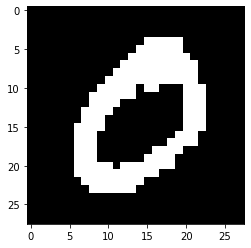

In [ ]:
## check of binarization of input data
bin_im, _ = trainloader_MNIST.dataset[1]
_ = plt.imshow(bin_im.numpy()[0], cmap='gray')

Building an instance of the model

In [ ]:
_ = torch.manual_seed(111)

In [ ]:
n_vis = 784
n_hid = 256
n_s = 1
lr = 1e-2

rbm_MNIST  = RBM(n_vis, n_hid, n_s)
optimizer_MNIST = torch.optim.SGD(rbm_MNIST.parameters(), lr)

### Training the model
Herafter we calcualte the accuracies for both the trainig data set and the test data set for each epoch during the trianing.
In the following section, where we explore dependency on hyperparameters, we skeep this part as it is quite time consuming and it doen't add much to the example case seen below.

In [ ]:
rbm_MNIST.train()

epochs = 20

for epoch in range(epochs):
  print("### epoch: ", epoch)
  print("Train accuracy: ", get_accuracy(rbm_MNIST, trainloader_MNIST, 64))
  print("Test accuracy: ", get_accuracy(rbm_MNIST, testloader_MNIST, 64))
  rbm_MNIST.train()
  loss_ = []
  for _, (data, target) in enumerate(trainloader_MNIST):
    v, v_r = rbm_MNIST(data.view(-1,784))
    loss = rbm_MNIST.free_energy(v) - rbm_MNIST.free_energy(v_r)
    loss_.append(loss.item())
    optimizer_MNIST.zero_grad()
    loss.backward()
    optimizer_MNIST.step()
  print("Training loss {}".format(np.mean(loss_)))
print("Final train accuracy: ", get_accuracy(rbm_MNIST, trainloader_MNIST, 64))
print("Final test accuracy: ", get_accuracy(rbm_MNIST, testloader_MNIST, 64))

### epoch:  0
Train accuracy:  0.16989770414034525
Test accuracy:  0.1721642852783203
Training loss 2734.8840869179667
### epoch:  1
Train accuracy:  0.9151114807128906
Test accuracy:  0.9196950252532959
Training loss -9.312796977028919
### epoch:  2
Train accuracy:  0.9271740226745605
Test accuracy:  0.9316160709381104
Training loss -10.245686252488257
### epoch:  3
Train accuracy:  0.9325881803512573
Test accuracy:  0.9371538272857666
Training loss -10.429013120085955
### epoch:  4
Train accuracy:  0.9362618837356568
Test accuracy:  0.9406914554595948
Training loss -10.343308536228594
### epoch:  5
Train accuracy:  0.9389653693517049
Test accuracy:  0.9433544654846191
Training loss -10.22440775726904
### epoch:  6
Train accuracy:  0.9409036142349243
Test accuracy:  0.9452442600250244
Training loss -9.985175159185934
### epoch:  7
Train accuracy:  0.9424238731384277
Test accuracy:  0.9466971935272217
Training loss -9.922067085054637
### epoch:  8
Train accuracy:  0.9437728523254395
Te

Plotting of a batch of input images and reconstructed images

In [ ]:
batch_img = next(iter(trainloader_MNIST))[0]
v_MNIST, v_r_MNIST = rbm_MNIST(batch_img.view(-1, 784))

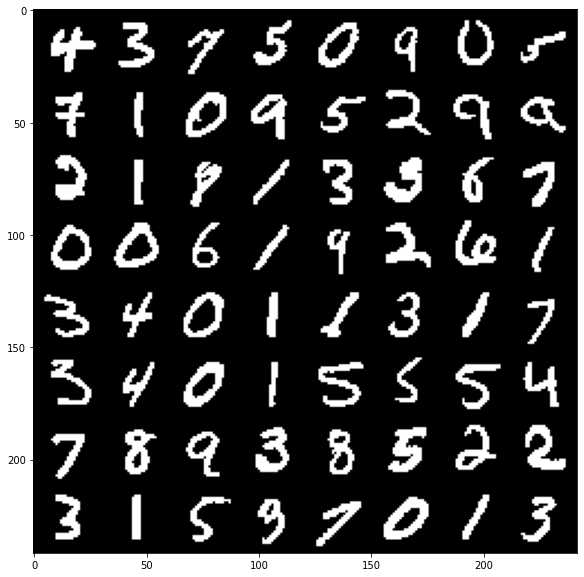

In [ ]:
plot_image(torchvision.utils.make_grid(v_MNIST.view(batch_size, 1, 28, 28).data))

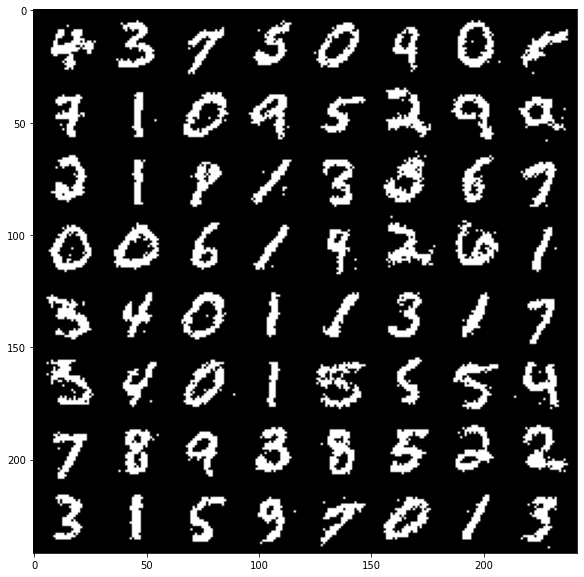

In [ ]:
plot_image(torchvision.utils.make_grid(v_r_MNIST.view(batch_size, 1, 28, 28).data))

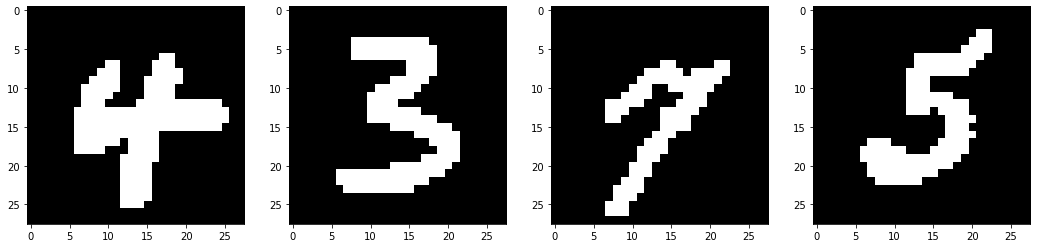

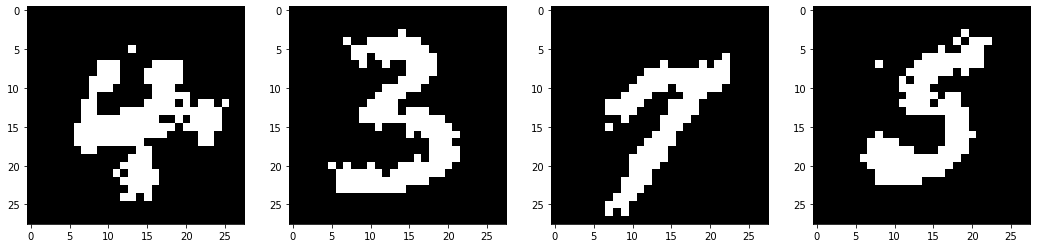

In [ ]:
compare_images(v_MNIST, v_r_MNIST)

A way to display the features learned by the BM could be plotting the weights for each hidden unit.

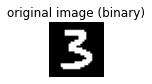

In [ ]:
n_img = 1      ## number of image in batch to show
img = batch_img[n_img:n_img+1]

P = torch.sigmoid(torch.nn.functional.linear(img.view(1, -1), rbm_MNIST.W, rbm_MNIST.b_h))    ## calculation of probabilities for each hidden unit
pr, indices = torch.sort(P.view(-1))   ## sorting of activations (the result is from lowest to highest)

fig1, ax1 = plt.subplots(1, 1, figsize=(1,1))
_ = ax1.imshow(img.view(28,28).numpy(), cmap='gray')
_ = ax1.set_title('original image (binary)')

_ = plt.axis('off')

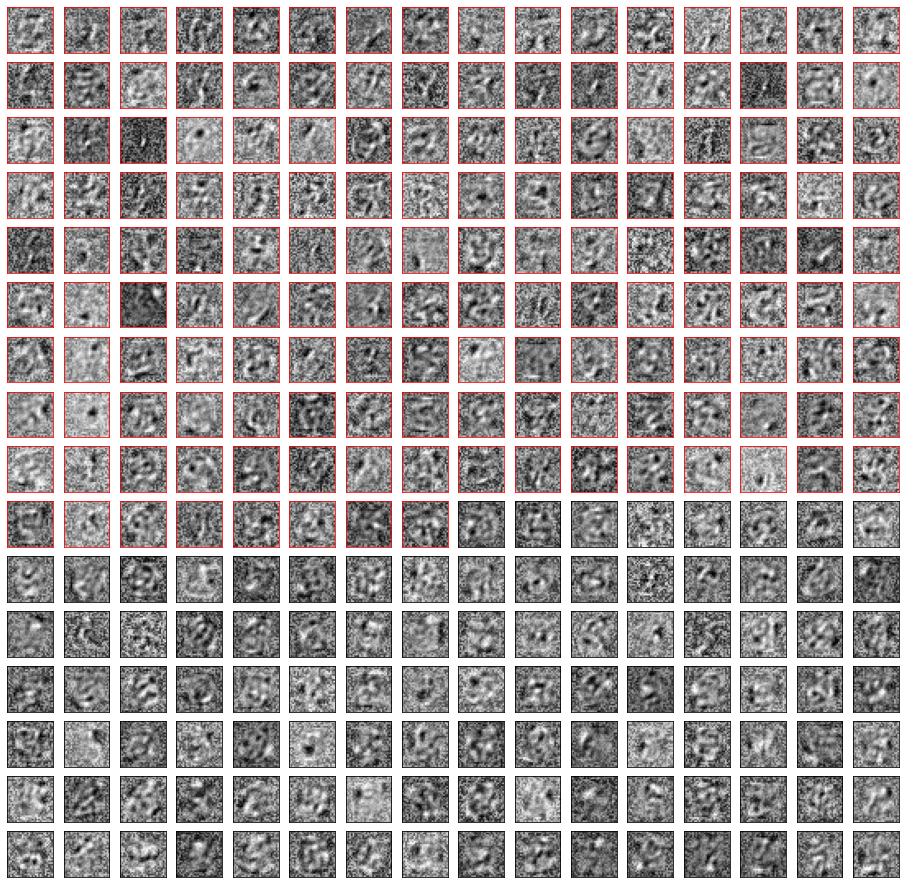

In [ ]:
fig2, ax2 = plt.subplots(16, 16, figsize=(16,16))

for j, indx in enumerate(indices.numpy()):
  feature = rbm_MNIST.W[indx].view(28, 28).data.numpy() ## feature = rbm_MNIST.W[indx].view(28, 28).data.numpy() > 0
  i = j//16
  ax2[i, j%16].imshow(feature, cmap='gray')
  ax2[i, j%16].set(xticklabels=[])
  ax2[i, j%16].set(yticklabels=[])
  ax2[i, j%16].tick_params(left=False, bottom=False)
  if P[0][indx].item() < 0.5:
    ax2[i, j%16].tick_params(color='red', labelcolor='red')
    for spine in ax2[i, j%16].spines.values():
      spine.set_edgecolor('red')

We try now changing some of the hyperparameters. We tried changing the the number of samplings. Besides the fact that it drastically slows down the computation, it doesn't seem to have a significant effect on the results and we do not report it.

We test configurations with different number of hidden units and a couple of learning rates.

We do not increase the number of epochs since we  see that with 20 epochs the results are already quite good and quite stable.

First of all, we define a function for performing training since we are going to use repeatedly and we avoid diplaying accuracy calculations at each step.


In [ ]:
def train(rbm_model, optimizer, trainloader, epochs, disp=True):
  rbm_model.train()

  losses = []
  for epoch in range(epochs):
    loss_ = []
    for _, (data, target) in enumerate(trainloader):
      v, v_r = rbm_model(data.view(-1,784))
      loss = rbm_model.free_energy(v) - rbm_model.free_energy(v_r)
      loss_.append(loss.item())
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
    losses.append(np.mean(loss_))
    tr_acc = get_accuracy(rbm_model, trainloader, batch_size)
    if disp:
      print("Training loss for {} epoch: {}".format(epoch, losses[-1]))
  if disp:
    print("Final train accuracy: ", tr_acc)
  return losses, tr_acc

In [ ]:
n_vis = 784
N_hid = [16, 32, 64, 128, 256, 512, 784]
n_s = 1
Lr = [1e-1, 1e-2]

epochs = 20

Losses = np.arange(epochs)
Acc = np.arange(len(Lr))

t0 = time.time()
for n_hid in N_hid:
  acc_ = []
  for lr in Lr:
    rbm  = RBM(n_vis, n_hid, n_s)
    optimizer = torch.optim.SGD(rbm.parameters(), lr)
    print("### training model with n_hidden={} and lr={} ...".format(n_hid, lr))
    losses, tr_acc = train(rbm, optimizer, trainloader_MNIST, epochs, disp=False)
    Losses = np.c_[Losses, losses]
    acc_.append(tr_acc)
  Acc = np.c_[Acc, acc_]
t1 = time.time()

### training model with n_hidden=16 and lr=0.1 ...
### training model with n_hidden=16 and lr=0.01 ...
### training model with n_hidden=32 and lr=0.1 ...
### training model with n_hidden=32 and lr=0.01 ...
### training model with n_hidden=64 and lr=0.1 ...
### training model with n_hidden=64 and lr=0.01 ...
### training model with n_hidden=128 and lr=0.1 ...
### training model with n_hidden=128 and lr=0.01 ...
### training model with n_hidden=256 and lr=0.1 ...
### training model with n_hidden=256 and lr=0.01 ...
### training model with n_hidden=512 and lr=0.1 ...
### training model with n_hidden=512 and lr=0.01 ...
### training model with n_hidden=784 and lr=0.1 ...
### training model with n_hidden=784 and lr=0.01 ...


In [ ]:
np.savetxt('Losses.csv', Losses, delimiter=',')
np.savetxt('Accuracy.csv', Acc, delimiter=',')

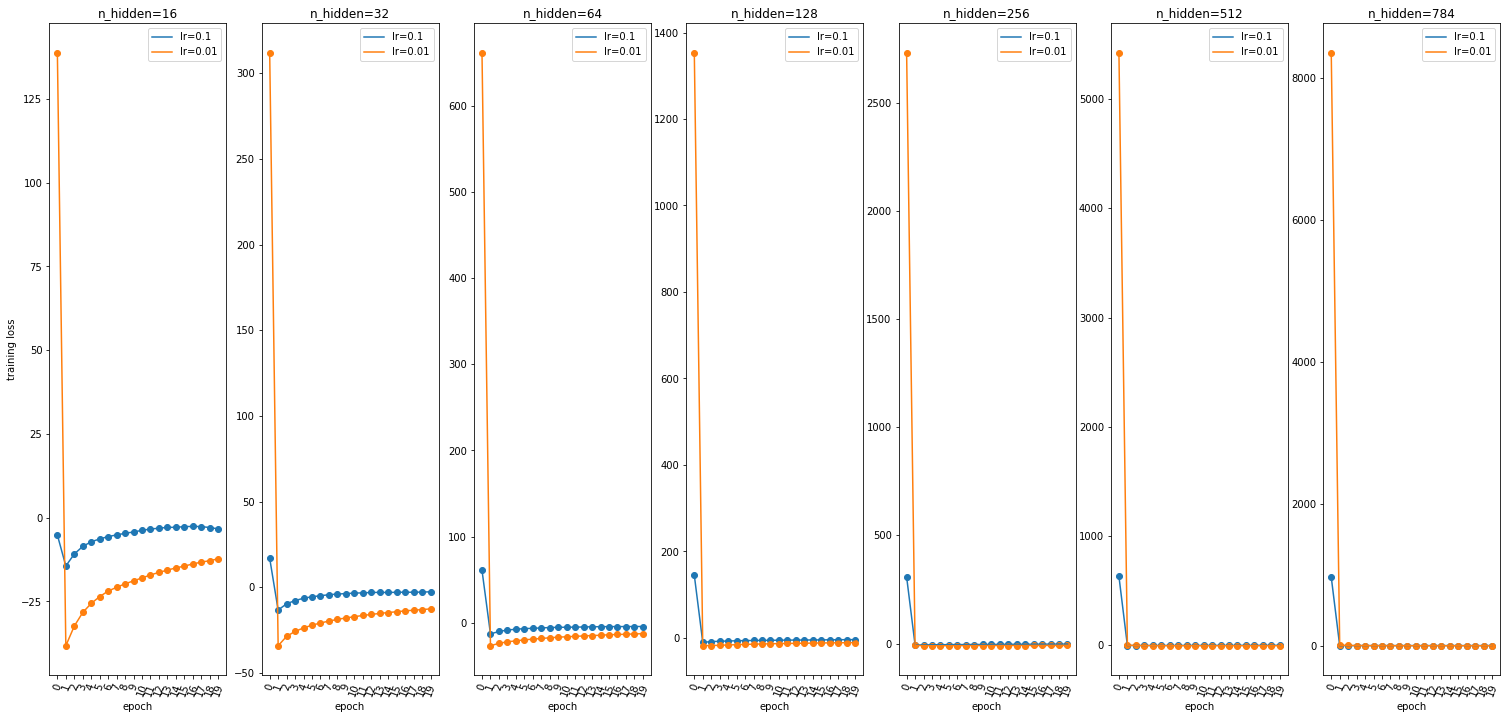

In [ ]:
fig3, ax3 = plt.subplots(1, len(N_hid), figsize=(26,12))

lines_lr = []
for r in range(len(Lr)):
  lines_lr.append('line' + str(h))

for h in range(len(N_hid)):
  for s in range(len(Lr)):
    lines_lr[s], = ax3[h].plot(Losses[:,0], Losses[:,2*h+s+1], label='lr='+str(Lr[s]))
    ax3[h].scatter(Losses[:,0], Losses[:,2*h+s+1], label='lr='+str(Lr[s]))
  _ = ax3[h].set_xticks([int(x) for x in Losses[:,0]])
  _ = ax3[h].legend(handles=lines_lr)
  _ = ax3[h].set_title("n_hidden="+str(N_hid[h]))
  _ = ax3[h].set_xlabel('epoch')
  _ = ax3[h].tick_params(axis='x', rotation=70)
_ = ax3[0].set_ylabel('training loss')


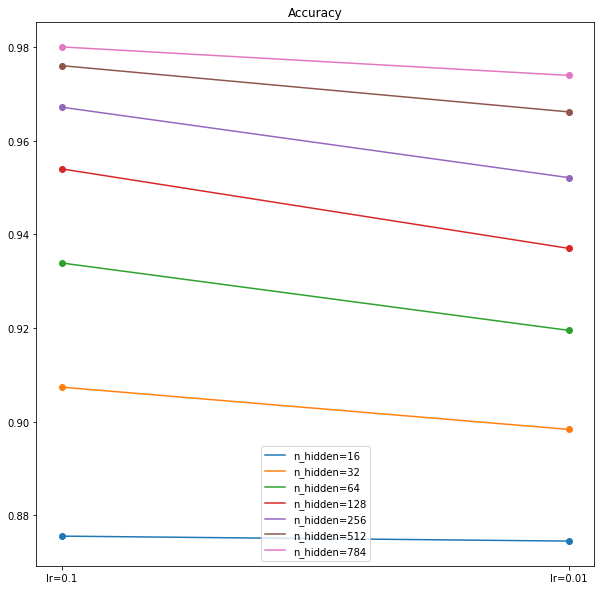

In [ ]:
fig4, ax4 = plt.subplots(1, 1, figsize=(10,10))

lines_h = []
for h in range(len(N_hid)):
  lines_h.append('line' + str(h))

for h in range(len(N_hid)):
  lines_h[h], = ax4.plot(['lr='+str(x) for x in Lr], Acc[:,h+1], label='n_hidden='+str(N_hid[h]))
  ax4.scatter(['lr='+str(x) for x in Lr], Acc[:,h+1], label='n_hidden='+str(N_hid[h]))
_ = ax4.set_xticks(['lr='+str(x) for x in Lr])
_ = ax4.legend(handles=lines_h)
_ = ax4.set_title("Accuracy")

From the results above, we can infer that increasing the number of hidden units up to the number of visible units provides better results in terms of accuracy. Moreover, it reduces the differences in the convergence dynamics of the loss value between the two tested learning rates.
In the experiments performed, a learning rate lr=0.1 performs better than lr=0.01. 


# 5 Quantum Boltzmann machine

Finally, we present a recent research article in quantum machine learning related to quantum Boltzmann machines [6].

Somehow the article returns to the main ideas behind BMs, which are rooted into physics and in particular the Ising model, while offering a different perspective, not only because of the notational and representation differences inherithed by quantum mechanics but because it allows generalization to another physical model, namely the transverse Ising model, which seems to provide more powerful representation capabilities. Moreover, such model is directly implementable on particular types of quantum processors, the so-called quantum annealing processors, which are mainly applicable to optimization problems.
The main author is in fact principal scientist at D-Wave, a Canadian firm engaged in develeoping quantum annealing processors.

A major difference of the study with respect to BM is the use of a quantum Boltzmann distribution which arises namely from the use of the transverse Ising model.
Moving to the quantum mechanincs formalism, the classical quadratic energy function can be written in the form of the Hamiltonian:

$$H = -\sum_a b_a \sigma_a^z - \sum_{a,b} w_{a,b} \sigma_a^z \sigma_b^z$$

Here, instead of a scalar function we have expressions written in operatorial form, or, giving a representation of such operators, in matrix form. So, instead of a (scalar) sum, we have to deal with matrices of dimension $2^N \times 2^N$: the energy equation of the classical case is replaced by the diagonal Hamiltonian given above, where $b_a$ and $w_{a,b}$ are still scalars. 

The transverse field Hamiltonian is given by:

$$H = - \sum_a \Gamma_a \sigma_a^x - \sum_a b_a \sigma_a^z - \sum_{a,b} w_{a,b} \sigma_a^z \sigma_b^z$$

where:

$$\sigma_a^z \equiv \overbrace{I \otimes \cdots \otimes I}^{a-1} \otimes \sigma_z \otimes \overbrace{I \otimes \cdots \otimes I}^{N-a} $$

and similarly for $\sigma_a^x$ and:

$$ I = \left(\begin{array}{cc} 1 & 0 \\ 0 & 1 \end{array} \right), \qquad \sigma_z = \left(\begin{array}{cc} 1 & 0 \\ 0 & -1 \end{array} \right), \qquad \sigma_x = \left( \begin{array}{cc} 0 & 1 \\1 & 0 \end{array} \right) $$

Adding the transverse field allows to have energy eigenstates of $H$ that are superpositions of the classical Hamiltonian ones.

As in the classical BM, we need to express the probability of each state in terms of its energy. In the quantum case, this is done through the thermal density matrix , which requires the exponentiation of a matrix. For the diagonal Hamiltonian this is easy since $e^-H$ is still a diagonal matrix with its $2^N$ diagonal elements given by $e^{-E_\textbf{z}}$, which, when normalized with the partition fucntion $Z = Tr[e^{-H}]$ gives the probaiity of each state.
So, the QBM requires defining the density matrix as:

$$\rho = Z^{-1} e^{-H}$$

Now, the situation of having the visible variables in a given $\textbf{v}$ corresponds to to performing the partial trace over the hidden variables, so that the marginal Boltzmann probability is given by:

$$P_\textbf{v} = Tr[\Lambda_\textbf{v} \rho]$$

where $\Lambda_\textbf{v}$ limits the trace only to diagonal terms that correspond to the visble variables being in state $\textbf{v}$.

<u>The probabilistic model of the QBM is given by the above defined density matrix, which in the case of tranverse field , has off-diagonal elements different from zero. In each measurement the states of the qubits are read out in the $\sigma_z$-basis and the outcome will be a classical value $\pm1$. Because of the statistical nature of quantum mechanics, after each measurement, a classical output  $\textbf{v}$ will appear for the visible varaibles with the probability $P_\textbf{v} = Tr[\Lambda_\textbf{v} \rho]$. 
To train the QBM, the parameters $\theta$ are changed such that the probability distributions $P(\textbf{v})$ becomes close to $P^{data}(\textbf{v})$ of the input data</u>.

As in the classical case, we are led to minimize a log-likelihood, which is defined in terms of traces of matrices. 
We do not report the gradient details, we simply point out that it is composed of two parts, one of which can be estiamted through sampling while another cannot, which renders the training of a QBM inefficient. 

The solution to this problem proposed by the authors is to minimize an upper-bound of the negative log-likelihood $\mathcal{L}$
(by defining a clamped Hamiltonian $H_\textbf{v}$ for which each visible qubit $\sigma_\nu^z$ is set to its corresponding classical data value $\textbf{v}_\nu$. This allows in turn to define the gradient expressions for the bias $\delta b_a$ and the weight $\delta w_{ab}$ as differences among averages that can be obtained by sampling from Boltzmann distributions with Hamiltonians $H$ and $H_\textbf{v}$.

## 5.1 Restricted QBM
Similarly to the classical case, a restricted QBM can be defined by setting connectivity restrictions among visible and hidden units.
Here a <u>difference emerges with respect to RBM.
In order to avoid computationally expensive samplings, it is sufficient to require no lateral connections in the hidden layer</u>: the hidden qubits become uncoupled when sampling from distributions with clamped and unclampled Hamiltonians (which is the point that can become computationally expensive in the estimation of the gradient).

<p align="center">

<img src="https://drive.google.com/uc?id=1qXfyE_6WIWK3qyNOzBnVCIGvaCwfJ_Ev" width='600'>

</p>

## 5.2 Results
The authors provide some examples obtained solving toy problems for which training data are generated as a mixture of $M=8$ factorized Bernoulli distributions, each peaked around a random point.  

The first example uses a fully visible architecture to compare BM with QBM and to evaluate the quality of the upper bound for the log-likelyhood using a fully connected model with $N=10$ qubits. A classical BM has $N+N(N-1)/2 = 55$ parameters.
For small systems the exact gradient formula can still be evaluated using exact diagonalization of the Hamiltonian.
The problem of finding the unknown parameters is solved by solving numerically the gradient expressions. The functions to optimize are different (especially when comparing the classical and the quantum versions) and according to the authors, the results below show the efficiency of QBM in representing data.

<p align="center">

<img src="https://drive.google.com/uc?id=1gOxVyylFfFjbUjTjODXZRsQT2rr_gRAD" width='600'>

</p>

The first chart shows that QBM and bQBM achieve lower values of KL-divergence, while the second shows the learning trajectories in the space of the classical and quantum everage energies $E_{cl}$, $E_q$:

$$ E_{cl} = - \left\langle \sum_a b_a\sigma_a^z + \sum_{a,b} w_{ab} \sigma_a^z \sigma_b^z \right\rangle $$

$$ E_q = -\left\langle \sum_a \Gamma_a \sigma_a^x \right\rangle $$

The classical BM has no quantum energy counterpart. As a note to the results, the authors used a fixed value $\Gamma=2$ for the BQBM learning, which is close to the optimal value found by the QBM model ($\Gamma=2.5$).

The authors perform an experiment also with restricted QBM with $8$ visible nodes and $2$ hidden nodes, allowing full connectivity within the visible layer and all-to-all connectivity between the layers. 
The authors found similar results to those shown above.

## 5.3 Conclusions
As the authors point out, they have shown only small-size examples in which QBM learned the data distribution better than BM. Whether QBM can learn and generalize better than BM at larger sizes are questions that need to be  answered in future works.
Moreover, stemming from the fact that the probabilistic model used in QBM, the quantum Boltzmann distribution, is different from the probabilistic model of a BM, the similarity between BM and QBM might not hold in all situations (for. ex. sampling from a conditional distribution cannot be performed by clamping in QBM, as it is commonly done in BM).
Finally, it is important to notice that a QBM can be trained using specific quantum camputing devices, namely the quantum annealing processor, which in fact is a physical implementatin of a time dependent transverse field Hamiltonian.

[6] Mohammad H. Amin, Evgeny Andriyash, Jason Rolfe, Bohdan Kulchytskyy, and Roger Melko. Quantum Boltzmann Machine, Phys. Rev. X 8, 021050, 2018.

